# K-Means Clustering

## Import all dependencies

In [1]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import collections
import pickle

## Fetch datasets

In [2]:
dataset = pd.read_csv(os.path.join("datasets.csv"))
dataset.head()

,Program Enrolled,Age,Year level,Gender,Educational Background,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11
0,1,21,4,1,1,1,1,1,1,1,1,2,2,2,2,2
1,2,21,4,1,1,3,4,3,2,2,2,2,2,2,2,2
2,2,21,4,2,1,2,5,2,3,2,2,2,2,2,2,2
3,2,21,4,4,1,1,1,4,1,3,2,2,2,2,2,2
4,1,28,4,1,2,2,1,1,2,3,3,3,3,3,3,3


#### Get Shape of Dataset

In [3]:
dataset.shape

(306, 16)

We have **306** observations (students) with **16** features (11 survey questions and 5 attributes).

In [4]:
X_questions = dataset.iloc[:,5:16]
question_means = X_questions.mean(axis = 0)
grand_mean = question_means.mean()
std_by_questions = question_means.std()
print('Grand Mean: \t\t', grand_mean)
print('Standard Deviation: \t', std_by_questions)

Grand Mean: 		 2.2026143790849675
Standard Deviation: 	 0.25496479869005917


### Data Preparation

_People tend to prefer explained variance ≥ 90%_

In [5]:
pca = PCA(n_components = 2, random_state=1)
X_pca = pca.fit_transform(dataset)
pca.explained_variance_ratio_.cumsum()[1]

0.6815614346350369

## Running K-Means with a range of k

Our output will be the `yield` property and we will get the 30% of the data to be the test data. 

In [6]:
distortions = []
K = range(1,10)
for i in K:
    model = KMeans(
            n_clusters=i,
            random_state=1)
    model.fit(X_pca)
    distortions.append(model.inertia_)

## Plotting the distortions of K-Means

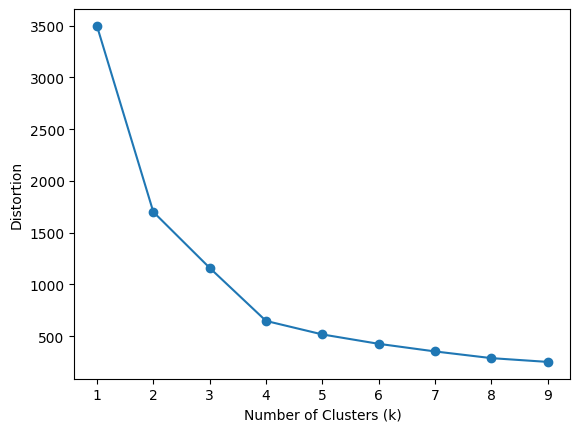

In [7]:
plt.plot(K, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

#### We can observe that the “elbow” is the number 4 which is optimal for this case. Now we can run a K-Means using as n_clusters the number 4.

In [8]:
model = KMeans(n_clusters=4, random_state=1)
model = model.fit(X_pca)
y = model.predict(X_pca)
print(X_pca)
print(y)

[[-6.92411578e-02 -2.87335776e+00]
 [ 9.42373669e-02  1.36702247e+00]
 [ 7.29399863e-02  1.29972985e+00]
 [ 1.54852459e-01 -1.36523881e+00]
 [-7.01850571e+00 -1.33948425e+00]
 [ 7.31786067e-02  1.20893233e+00]
 [ 1.04903285e+00  2.02973638e-01]
 [-7.95443687e+00 -1.12884995e-01]
 [-9.80545603e-01 -2.22958781e+00]
 [-1.00423418e+00  3.83238959e-01]
 [-9.58826615e-01 -2.13465669e+00]
 [ 4.01887252e-02 -2.25409620e+00]
 [ 2.10748487e+01 -4.65125100e-01]
 [-3.29569510e-03 -1.43598698e+00]
 [ 1.03411163e+00 -1.05739381e+00]
 [ 1.18477274e+00  3.02356734e+00]
 [ 1.16982010e-01  1.23524277e+00]
 [-2.04351116e+00 -1.94950069e+00]
 [-1.95059688e+00  6.56553509e-01]
 [-1.91446255e+00  1.70575724e+00]
 [ 9.83349369e-02  3.72668267e-01]
 [-8.66228109e-01  1.73681175e+00]
 [ 5.19511616e-02  1.22345192e+00]
 [ 5.35756833e-02 -5.60032635e-01]
 [ 8.90135420e-02  3.22325901e+00]
 [-9.30349999e-01 -1.01366765e+00]
 [-1.03661982e+00 -2.67169442e+00]
 [-2.03762979e+00 -7.09588820e-01]
 [ 6.71437752e-02 -8

## K-Means vs Actual for n_clusters=4

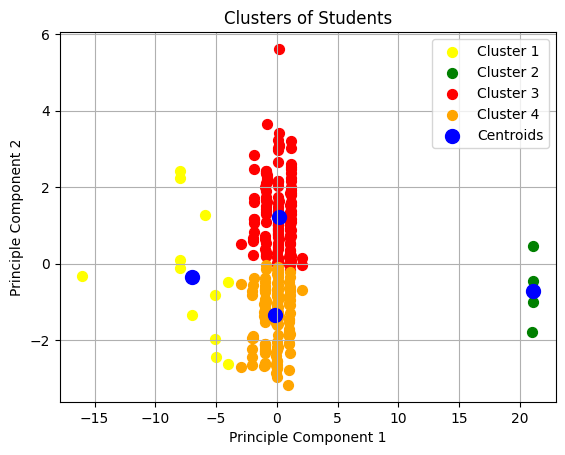

In [9]:
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], s = 50, c = 'red', label = 'Cluster 3')
plt.scatter(X_pca[y == 3, 0], X_pca[y == 3, 1], s = 50, c = 'orange', label = 'Cluster 4')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')
plt.title('Clusters of Students')
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.grid()
plt.show()


### Result

In [10]:
print('K Means Result : ')
print(collections.Counter(y))

K Means Result : 
Counter({2: 155, 3: 135, 0: 12, 1: 4})


Silhouette Average:  0.4253850812314909


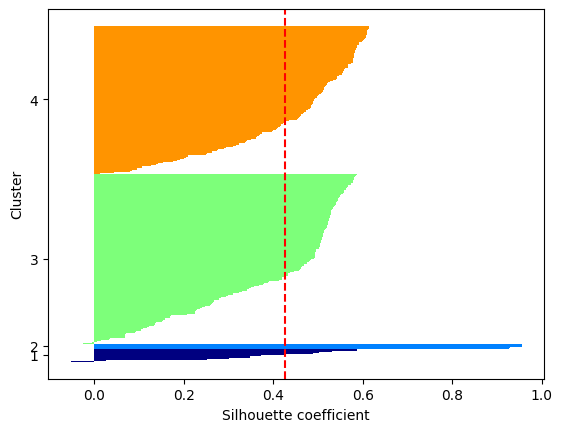

In [11]:
cluster_labels = np.unique(y)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_pca, y, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
print('Silhouette Average: ', silhouette_avg)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

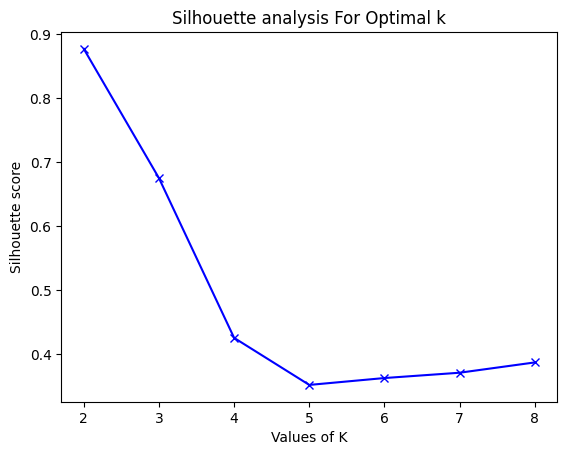

In [12]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_pca)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(X_pca, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

## Export Model

In [13]:
pickle.dump(model, open('model.pkl', 'wb'))